In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# Market Basket Analysis

minimal example, inspired by: https://dzenanhamzic.com/2017/01/19/market-basket-analysis-mining-frequent-pairs-in-python/

In [78]:
transaction_df = pd.DataFrame({'Beer': [1,0,1,0,1,0,0,1],
                               'Coke': [0,1,1,0,1,0,0,1],
                               'Pepsi': [1,0,0,1,0,0,1,0],
                               'Milk': [0,1,0,1,1,1,0,1],
                               'Juice': [0,0,1,0,0,1,1,1],
                               'Yeast': [0, 0, 0, 1, 1, 1, 0, 0],
                               'Flour': [0, 1, 0, 1, 0, 1, 0, 0],
                               'Eggs': [0, 1, 0, 1, 1, 1, 0, 0]})

/home/matthias/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



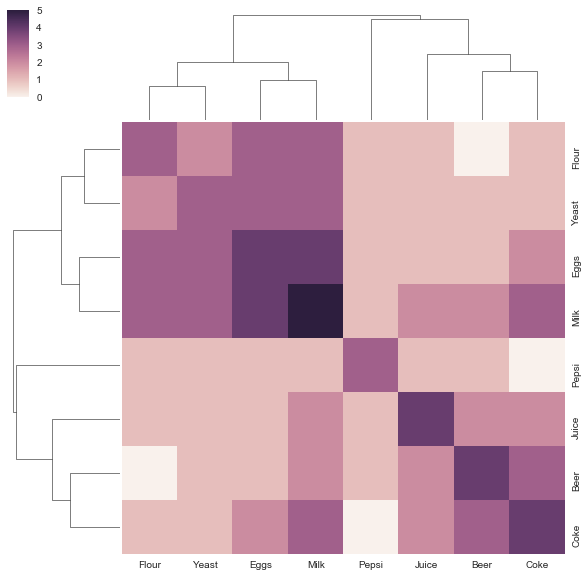

In [79]:
# item-item correlation
matrix = np.dot(transaction_df.as_matrix().T, transaction_df.as_matrix())
frequency_items_df = pd.DataFrame(matrix, index=transaction_df.columns,
                                  columns=transaction_df.columns)
sns.clustermap(frequency_items_df)

['Milk', 'Beer', 'Pepsi', 'Flour', 'Eggs', 'Coke', 'Yeast', 'Juice']


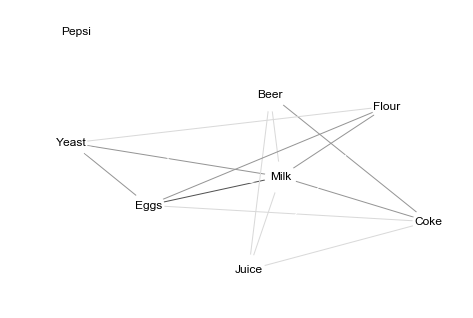

In [80]:
import networkx as nx

n_columns = len(frequency_items_df.columns)
labels = dict(zip(range(n_columns), frequency_items_df.columns))
G = nx.from_numpy_array(matrix)
G = nx.relabel_nodes(G, labels)
pos = nx.spring_layout(G)
print(G.nodes)

edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nx.draw(G, pos, with_labels=True, edgelist=edges, node_size=1000,
        node_color='white', edge_color=weights,
        edge_cmap=plt.get_cmap('Greys'))

## use plotly instead of matplotlib

In [155]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Figure, Data, Layout, Scatter, Scene,\
                              XAxis, YAxis, ZAxis, Marker, Line
init_notebook_mode(connected=True)

position_dict = nx.fruchterman_reingold_layout(G, dim=2)
nodes, positions = zip(*position_dict.items())
positions = np.vstack(positions)

node_scatter = Scatter(x=positions[:, 0], y=positions[:, 1],
                       mode='markers', text=nodes, hoverinfo='text',
                       marker=Marker(size=20, showscale=False))

edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
positions = [(position_dict[node1], position_dict[node2])
             for node1, node2 in edges]

positions = np.array(positions)
weights = np.array(weights)
                         
norm = plt.Normalize(weights.min(), weights.max())

edge_scatter = [dict(type='scatter',
                     x=pos[:, 0], y=pos[:, 1],
                     mode='lines', hoverinfo='none', opacity=norm(weight),
                     line=Line(width=3, color='black'))
                for pos, edge, weight
                in zip(positions, edges, weights)]

fig = Figure(data=Data(edge_scatter + [node_scatter]),
             layout=Layout(title='networkx graph',
                           hovermode='closest',
                           showlegend=False,
                           xaxis=XAxis(showgrid=False, zeroline=False,
                                       showticklabels=False),
                           yaxis=YAxis(showgrid=False, zeroline=False,
                                       showticklabels=False)))

iplot(fig)

In [162]:
position_dict = nx.fruchterman_reingold_layout(G, dim=3)
nodes, positions = zip(*position_dict.items())
positions = np.vstack(positions)

node_scatter = dict(type='scatter3d',
                    x=positions[:, 0], y=positions[:, 1], z=positions[:, 2],
                    mode='markers+text', text=nodes, hoverinfo='text',
                    marker=Marker(size=5, showscale=False))

edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
positions = [(position_dict[node1], position_dict[node2])
             for node1, node2 in edges]

positions = np.array(positions)
weights = np.array(weights)
                         
norm = plt.Normalize(weights.min(), weights.max())

edge_scatter = [dict(type='scatter3d',
                     x=pos[:, 0], y=pos[:, 1], z=pos[:, 2],
                     mode='lines', hoverinfo='none', opacity=norm(weight),
                     line=Line(width=5, color='black'))
                for pos, edge, weight
                in zip(positions, edges, weights)]

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )
fig = Figure(data=Data(edge_scatter + [node_scatter]),
             layout=Layout(title='networkx graph',
                           hovermode='closest',
                           showlegend=False,
                           scene=Scene(
                               xaxis=XAxis(axis),
                               yaxis=YAxis(axis),
                               zaxis=ZAxis(axis))))

iplot(fig)